Visualizations

Logistic Regression, LDA, Decision Tree


Each subject has 6 AuC values per test

12 Subjects

6 Events

6 Algorithms

Types of Graphs 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

In [34]:
df_svm_1_6 = pd.read_csv('Mina_results_svc_1_6.csv')
df_svm_7_12 = pd.read_csv('Mina_results_svc_7_12.csv')
df_svm = [df_svm_1_6, df_svm_7_12]
df = pd.concat(df_svm)
df = df.replace(to_replace =["Support Vector Machine"], value ="New SVM") 
df

,Unnamed: 0,Subject,Classifier,AUC Score
0,0,1,New SVM,"[0.5722634372637072, 0.6158326361855673, 0.634..."
1,1,2,New SVM,"[0.5545711404206568, 0.5779917573650015, 0.471..."
2,2,3,New SVM,"[0.659335963321983, 0.6594008188331627, 0.2730..."
3,3,4,New SVM,"[0.6272041753948325, 0.6405383015672234, 0.564..."
4,4,5,New SVM,"[0.46846757015686336, 0.550228745204026, 0.538..."
5,5,6,New SVM,"[0.5905295793595786, 0.5186512204600789, 0.530..."
0,0,7,New SVM,"[0.3535541237078501, 0.509299759799093, 0.5470..."
1,1,8,New SVM,"[0.5424488699952497, 0.6127146762777642, 0.630..."
2,2,9,New SVM,"[0.6454039149875279, 0.49318133189635344, 0.51..."
3,3,10,New SVM,"[0.6932957423681397, 0.6728023322727018, 0.641..."


In [35]:
#loading in our data
df_prabesh = pd.read_csv('Prabesh_results_Decision_Tree + AdaBoost - Prabesh_results_Decision_Tree.csv')
df_mina = pd.read_csv('Mina_results.csv')
df_mina2 = pd.read_csv('Mina_results_svc.csv')
df_shae = pd.read_csv('Shae_Results_knearest.csv')


#concating 
dfs = [df_prabesh, df_mina, df_shae, df_mina2, df]
df_all = pd.concat(dfs)
#renaming columns
df_all.columns = ["a","Subject","Classifier", "AUC_Score"]
#dropping extra column
df_all.drop(['a'], axis=1, inplace = True)


#AUC cell was a string which needed to be a list of floats instead
def AUC_Formatting(cell):
    #remove certain characters from string
    cell = cell.replace('[', '')
    cell = cell.replace(']', '')
    #create new list
    list_a = []
    #split string by commas and create list from values
    for i in cell.split(','):
        i = float(i)
        list_a.append(i)
    return(list_a)

df_all["AUC_Score"] = df_all["AUC_Score"].apply(AUC_Formatting)    
    
df_all[['Event1','Event2','Event3','Event4','Event5','Event6']] = pd.DataFrame(df_all.AUC_Score.values.tolist(), index= df_all.index)    

#df_decision = df_all.copy()
#df_LR = df_all.copy()
#df_LDA = df_all.copy()

#Too lazy to find an easier way to do this but creating dataframes for each of the algorithms
a = ['LDA', "Logistic Regression",'K-nearest Neighbors','Support Vector Machine', 'AdaBoost', 'New SVM']
df_decision = df_all[~df_all['Classifier'].isin(a)]
b = ['LDA', "Decision Tree",'K-nearest Neighbors','Support Vector Machine', 'AdaBoost', 'New SVM']
df_LR = df_all[~df_all['Classifier'].isin(b)]
c = ['Decision Tree', "Logistic Regression",'K-nearest Neighbors','Support Vector Machine', 'AdaBoost', 'New SVM']
df_LDA = df_all[~df_all['Classifier'].isin(c)]
d = ['Decision Tree', "Logistic Regression",'LDA','Support Vector Machine', 'AdaBoost', 'New SVM']
df_k = df_all[~df_all['Classifier'].isin(d)]
e = ['Decision Tree', "Logistic Regression",'LDA','K-nearest Neighbors', 'AdaBoost', 'New SVM']
df_svm = df_all[~df_all['Classifier'].isin(e)]
f = ['Decision Tree', "Logistic Regression",'LDA','K-nearest Neighbors', 'Support Vector Machine', 'New SVM']
df_ada = df_all[~df_all['Classifier'].isin(f)]

g = ['Decision Tree', "Logistic Regression",'LDA','K-nearest Neighbors', 'Support Vector Machine', 'AdBoost']
df_new_svm = df_all[~df_all['Classifier'].isin(g)]


Text(0, 0.5, 'Mean AUC Score')

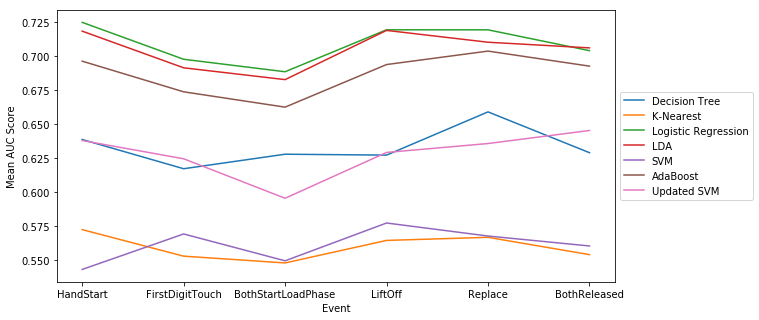

In [43]:
#Actually Graphing stuff
events = ['Event1','Event2','Event3','Event4','Event5','Event6']

#Calculating means of all of the methods

#Decision Tree
mean_decision = []
for event in events:
    event = df_decision[event].mean()
    mean_decision.append(event)
    
#Logistic Regression
mean_LR = []
for event in events:
    event = df_LR[event].mean()
    mean_LR.append(event)

#LDA
mean_LDA = []
for event in events:
    event = df_LDA[event].mean()
    mean_LDA.append(event)

#K-nearest
mean_k = []
for event in events:
    event = df_k[event].mean()
    mean_k.append(event)
    #K-nearest

    
#SVM   
mean_svm = []
for event in events:
    event = df_svm[event].mean()
    mean_svm.append(event)
    
#New SVM   
mean_new_svm = []
for event in events:
    event = df_new_svm[event].mean()
    mean_new_svm.append(event)

#ada  
mean_ada = []
for event in events:
    event = df_ada[event].mean()
    mean_ada.append(event)
    
    

means = [mean_decision, mean_k, mean_LR, mean_LDA, mean_svm, mean_ada, mean_new_svm] 


#creating dataframe of all of the means
    
df_all_means = pd.DataFrame(means, index =['Decision Tree', 'K-Nearest', 'Logistic Regression', 'LDA','SVM', 'AdaBoost', 'Updated SVM'], 
                                              columns =['HandStart','FirstDigitTouch','BothStartLoadPhase','LiftOff','Replace','BothReleased'])
#df_all_means['Classifier'] = classifiers
#df_all_means.plot()
#df_all_means.plot(['Event1','Event2','Event3','Event4','Event5','Event6'],'Classifier',kind = 'line')
df_all_means_T = df_all_means.T
df_all_means_T.plot(figsize=(10,5))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#df_all_means_T
plt.xticks(np.arange(6), ('HandStart', 'FirstDigitTouch', 'BothStartLoadPhase', 'LiftOff', 'Replace', 'BothReleased'))
plt.xlabel('Event')
plt.ylabel('Mean AUC Score')


In [37]:
#fig=pd.plotting.scatter_matrix(df_all_means)
df_all_means

,HandStart,FirstDigitTouch,BothStartLoadPhase,LiftOff,Replace,BothReleased
Decision Tree,0.638635,0.617162,0.627826,0.627172,0.658919,0.628948
K-Nearest,0.572431,0.552945,0.547964,0.564507,0.566777,0.554066
Logistic Regression,0.724681,0.697568,0.688406,0.719219,0.719194,0.703894
LDA,0.718225,0.691300,0.682613,0.718769,0.710082,0.705928
SVM,0.543186,0.569247,0.549533,0.577298,0.567729,0.560430
AdaBoost,0.696170,0.673668,0.662402,0.693686,0.703569,0.692524
New SVM,0.637875,0.624471,0.595467,0.629130,0.635677,0.645248


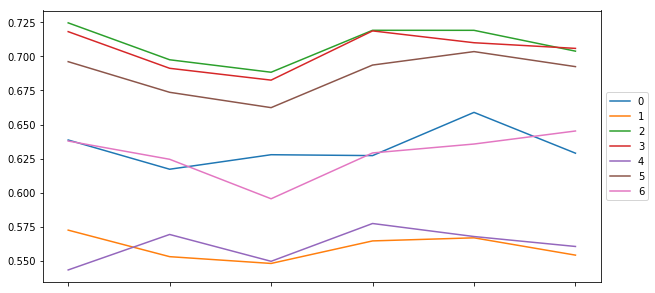

In [44]:
df_decision
df_decision = pd.DataFrame(means, columns =['HandStart','FirstDigitTouch','BothStartLoadPhase','LiftOff','Replace','BothReleased'])
#df_all_means['Classifier'] = classifiers
#df_all_means.plot()
#df_all_means.plot(['Event1','Event2','Event3','Event4','Event5','Event6'],'Classifier',kind = 'line')
df_decision_T = df_decision.T
df_decision_T.plot(figsize=(10,5))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [6]:
df_k

,Subject,Classifier,AUC_Score,Event1,Event2,Event3,Event4,Event5,Event6
0,1,K-nearest Neighbors,"[0.5491005885622443, 0.5324531036222796, 0.526...",0.549101,0.532453,0.526626,0.551671,0.636988,0.581403
1,2,K-nearest Neighbors,"[0.542589796580688, 0.6004457980879975, 0.5094...",0.542590,0.600446,0.509468,0.557798,0.656501,0.609855
2,3,K-nearest Neighbors,"[0.5820024232734149, 0.5667418318493097, 0.560...",0.582002,0.566742,0.560669,0.607017,0.512785,0.534248
3,4,K-nearest Neighbors,"[0.6277065375171358, 0.5850604474622214, 0.571...",0.627707,0.585060,0.571038,0.563396,0.587678,0.569776
4,5,K-nearest Neighbors,"[0.5217766393966646, 0.5343243965614718, 0.531...",0.521777,0.534324,0.531232,0.528617,0.519713,0.508404
5,6,K-nearest Neighbors,"[0.5155803996282331, 0.5236840882445292, 0.531...",0.515580,0.523684,0.531182,0.563340,0.584841,0.567425
6,7,K-nearest Neighbors,"[0.628114164705141, 0.5930084092767454, 0.6026...",0.628114,0.593008,0.602641,0.575755,0.598826,0.578885
7,8,K-nearest Neighbors,"[0.5095963291406219, 0.5644017189214434, 0.572...",0.509596,0.564402,0.572080,0.584942,0.572582,0.567312
8,9,K-nearest Neighbors,"[0.6040333001642719, 0.5505240545978883, 0.576...",0.604033,0.550524,0.576981,0.585440,0.523137,0.537058
9,10,K-nearest Neighbors,"[0.5851168591734874, 0.5630783754236078, 0.575...",0.585117,0.563078,0.575204,0.592290,0.538429,0.523686


In [7]:
df_LR

,Subject,Classifier,AUC_Score,Event1,Event2,Event3,Event4,Event5,Event6
0,1,Logistic Regression,"[0.7093621988836294, 0.6851200491048052, 0.685...",0.709362,0.685120,0.685025,0.745556,0.845796,0.810207
2,2,Logistic Regression,"[0.7331407077472605, 0.787967038905993, 0.6256...",0.733141,0.787967,0.625651,0.697495,0.854080,0.820374
4,3,Logistic Regression,"[0.7274347000622153, 0.747661854460879, 0.7450...",0.727435,0.747662,0.745008,0.719922,0.605277,0.600875
6,4,Logistic Regression,"[0.7195217347621252, 0.7517720755862322, 0.716...",0.719522,0.751772,0.716362,0.705261,0.682791,0.680972
8,5,Logistic Regression,"[0.6017515376540774, 0.6220992505910143, 0.638...",0.601752,0.622099,0.638317,0.672155,0.590036,0.606470
10,6,Logistic Regression,"[0.6666514741233214, 0.646268466850582, 0.6675...",0.666651,0.646268,0.667543,0.703796,0.845872,0.828370
12,7,Logistic Regression,"[0.7936394100677698, 0.7578625023527972, 0.744...",0.793639,0.757863,0.744813,0.762720,0.713684,0.680479
14,8,Logistic Regression,"[0.6231161627393045, 0.69352071212255, 0.72005...",0.623116,0.693521,0.720055,0.716203,0.695488,0.708788
16,9,Logistic Regression,"[0.7404817297014608, 0.6758330765586344, 0.700...",0.740482,0.675833,0.700536,0.732158,0.637169,0.682006
18,10,Logistic Regression,"[0.8351444520668161, 0.8261028892772418, 0.805...",0.835144,0.826103,0.805663,0.794933,0.766779,0.681595


In [8]:
df_LDA

,Subject,Classifier,AUC_Score,Event1,Event2,Event3,Event4,Event5,Event6
1,1,LDA,"[0.7094111523229811, 0.6912432064853079, 0.684...",0.709411,0.691243,0.684396,0.740157,0.790239,0.777654
3,2,LDA,"[0.69388517223069, 0.7469668398655701, 0.57276...",0.693885,0.746967,0.572768,0.702364,0.823157,0.799381
5,3,LDA,"[0.7281454302999489, 0.7323430268729805, 0.733...",0.728145,0.732343,0.733759,0.698658,0.633258,0.634292
7,4,LDA,"[0.7122236365249099, 0.7255638506587164, 0.697...",0.712224,0.725564,0.697597,0.699810,0.696405,0.705864
9,5,LDA,"[0.5982185634738488, 0.6180381238540575, 0.637...",0.598219,0.618038,0.637469,0.674848,0.592915,0.613027
11,6,LDA,"[0.6479323902299002, 0.6486732144484646, 0.669...",0.647932,0.648673,0.669454,0.713529,0.818817,0.805548
13,7,LDA,"[0.7900101545337876, 0.752248587448617, 0.7439...",0.790010,0.752249,0.743959,0.752541,0.709236,0.743501
15,8,LDA,"[0.6206897110202523, 0.6979204191041646, 0.749...",0.620690,0.697920,0.749695,0.744387,0.682621,0.704438
17,9,LDA,"[0.7164604074978531, 0.6761702740516828, 0.693...",0.716460,0.676170,0.693643,0.735840,0.628294,0.688149
19,10,LDA,"[0.8390902021962494, 0.824974729007391, 0.8062...",0.839090,0.824975,0.806217,0.796176,0.756001,0.670532


In [9]:
df_svm

,Subject,Classifier,AUC_Score,Event1,Event2,Event3,Event4,Event5,Event6
0,1,Support Vector Machine,"[0.5722606322386383, 0.6158322915039484, 0.554...",0.572261,0.615832,0.554078,0.561919,0.701362,0.625621
1,2,Support Vector Machine,"[0.5021307133878637, 0.48478690884151043, 0.41...",0.502131,0.484787,0.411879,0.489484,0.484750,0.522391
2,3,Support Vector Machine,"[0.4864048721911146, 0.6594008188331627, 0.627...",0.486405,0.659401,0.627910,0.611118,0.461287,0.352681
3,4,Support Vector Machine,"[0.6272045575213985, 0.6445992425570446, 0.630...",0.627205,0.644599,0.630524,0.620432,0.665683,0.663665
4,5,Support Vector Machine,"[0.5736658549751039, 0.550228745204026, 0.5380...",0.573666,0.550229,0.538048,0.550092,0.543845,0.602802
5,6,Support Vector Machine,"[0.5103727706626917, 0.5186512204600789, 0.537...",0.510373,0.518651,0.537943,0.538329,0.606424,0.496892
6,7,Support Vector Machine,"[0.36861991169518216, 0.6517320674803264, 0.33...",0.368620,0.651732,0.337521,0.573432,0.589716,0.458326
7,8,Support Vector Machine,"[0.5424488699952497, 0.6127146762777642, 0.630...",0.542449,0.612715,0.630269,0.641991,0.586510,0.628669
8,9,Support Vector Machine,"[0.6454040942905447, 0.514280407275821, 0.5505...",0.645404,0.514280,0.550568,0.620879,0.540926,0.628814
9,10,Support Vector Machine,"[0.5947261444802182, 0.5009145906188842, 0.713...",0.594726,0.500915,0.713022,0.651317,0.649885,0.532334


In [10]:
df_ada

,Subject,Classifier,AUC_Score,Event1,Event2,Event3,Event4,Event5,Event6
12,1,AdaBoost,"[0.716107310459275, 0.6556219870631517, 0.6618...",0.716107,0.655622,0.661878,0.721107,0.837297,0.769171
13,2,AdaBoost,"[0.7008121692639755, 0.7838515536285744, 0.587...",0.700812,0.783852,0.587822,0.687782,0.801590,0.799600
14,3,AdaBoost,"[0.6842619844662532, 0.6815425418615075, 0.729...",0.684262,0.681543,0.729374,0.698966,0.550638,0.585387
15,4,AdaBoost,"[0.7347836171537414, 0.7281977372558268, 0.666...",0.734784,0.728198,0.666212,0.678899,0.651670,0.660748
16,5,AdaBoost,"[0.5988948867128756, 0.5949625351350452, 0.623...",0.598895,0.594963,0.623063,0.632327,0.566467,0.602113
17,6,AdaBoost,"[0.6198682943883422, 0.6203429379805105, 0.656...",0.619868,0.620343,0.656725,0.688188,0.820594,0.807404
18,7,AdaBoost,"[0.7507679955935253, 0.7354040391568173, 0.738...",0.750768,0.735404,0.738652,0.725348,0.729778,0.689603
19,8,AdaBoost,"[0.5384316904789432, 0.6545534762769883, 0.677...",0.538432,0.654553,0.677445,0.676881,0.676908,0.704374
20,9,AdaBoost,"[0.7299744720824004, 0.6510376617001727, 0.656...",0.729974,0.651038,0.656063,0.737558,0.660479,0.686281
21,10,AdaBoost,"[0.7777292803731586, 0.7729882471051239, 0.767...",0.777729,0.772988,0.767426,0.742289,0.741631,0.659009


In [45]:
df_new_svm

,Subject,Classifier,AUC_Score,Event1,Event2,Event3,Event4,Event5,Event6
12,1,AdaBoost,"[0.716107310459275, 0.6556219870631517, 0.6618...",0.716107,0.655622,0.661878,0.721107,0.837297,0.769171
13,2,AdaBoost,"[0.7008121692639755, 0.7838515536285744, 0.587...",0.700812,0.783852,0.587822,0.687782,0.801590,0.799600
14,3,AdaBoost,"[0.6842619844662532, 0.6815425418615075, 0.729...",0.684262,0.681543,0.729374,0.698966,0.550638,0.585387
15,4,AdaBoost,"[0.7347836171537414, 0.7281977372558268, 0.666...",0.734784,0.728198,0.666212,0.678899,0.651670,0.660748
16,5,AdaBoost,"[0.5988948867128756, 0.5949625351350452, 0.623...",0.598895,0.594963,0.623063,0.632327,0.566467,0.602113
17,6,AdaBoost,"[0.6198682943883422, 0.6203429379805105, 0.656...",0.619868,0.620343,0.656725,0.688188,0.820594,0.807404
18,7,AdaBoost,"[0.7507679955935253, 0.7354040391568173, 0.738...",0.750768,0.735404,0.738652,0.725348,0.729778,0.689603
19,8,AdaBoost,"[0.5384316904789432, 0.6545534762769883, 0.677...",0.538432,0.654553,0.677445,0.676881,0.676908,0.704374
20,9,AdaBoost,"[0.7299744720824004, 0.6510376617001727, 0.656...",0.729974,0.651038,0.656063,0.737558,0.660479,0.686281
21,10,AdaBoost,"[0.7777292803731586, 0.7729882471051239, 0.767...",0.777729,0.772988,0.767426,0.742289,0.741631,0.659009
